In [1]:
import sys  
sys.path.insert(0, '/home/dfki/Desktop/Thesis/hyperopt')
import temp
import pickle
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats
import random
from hyperopt import fmin, tpe, hp, STATUS_OK,Trials,trials_from_docs
import seaborn as sns
import numpy as np
import pandas as pd


# influence of number of the point on TPE (time wise)

### - 10000 iteration of dataset3 

total time point finding is 16653.101431000003
mean time for each configuration finding 2.7750543961006504


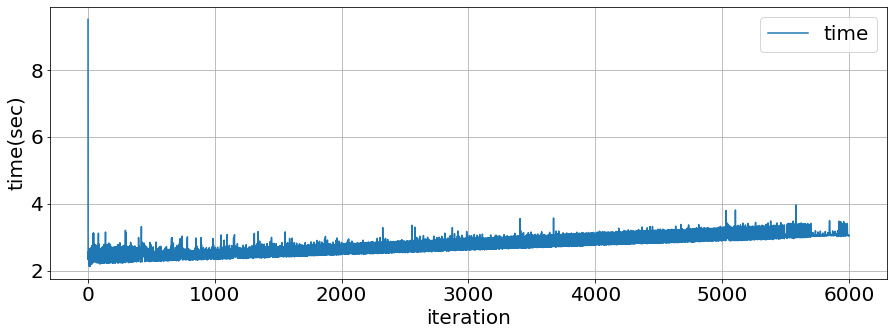

In [2]:
it1000_0in_timetracker_3 = pickle.load(open("/home/dfki/Desktop/Thesis/hyperopt/result_openml/result_onserver_openmlspace/3/10000it_0in_timetracker_3.p", "rb"))
it1000_0in_timetracker_3 = np.array(it1000_0in_timetracker_3[0:12000])

temp.time_tracker_plot(it1000_0in_timetracker_3, 'time', 'iteration', 'time(sec)', show_plot=True)

In [8]:
it1000_0in_timetracker_3

array([['0start', datetime.datetime(2020, 2, 14, 15, 28, 56, 469822)],
       ['start', datetime.datetime(2020, 2, 14, 15, 29, 5, 982774)],
       ['end', datetime.datetime(2020, 2, 14, 15, 29, 7, 787240)],
       ...,
       ['end', datetime.datetime(2020, 2, 16, 2, 5, 32, 812257)],
       ['start', datetime.datetime(2020, 2, 16, 2, 5, 36, 422599)],
       ['end', datetime.datetime(2020, 2, 16, 2, 5, 53, 75545)]],
      dtype=object)

In [36]:
import pickle
trial = pickle.load(open("/home/dfki/Desktop/Thesis/openml_test/pickel_files/31/trial_31.p", "rb"))
len(trial.trials)

8743

### Dataset overview - 100 iteration 

Text(0.5, 0.98, 'Compare average result of hyperot after 100 iteration')

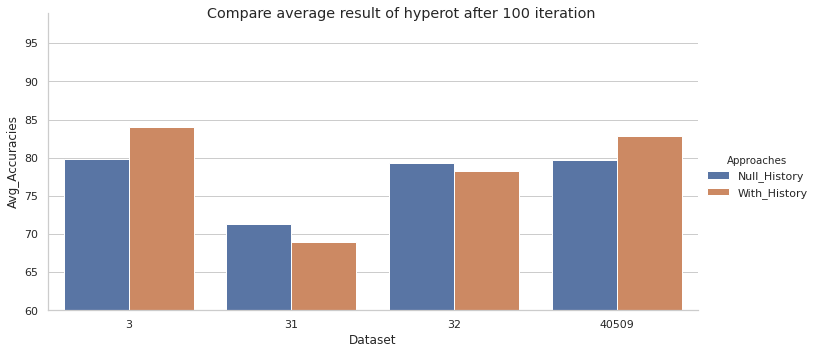

In [18]:
#in this section I need to show the bar chart which has 3 items
#1) null-history 2) with all history 3) with best amount of history

dataset_3 = 79.84
dataset_3_history = 83.99 #21249 history 
dataset_3_lf = 85.40
dataset_3_gamma1 = 83.99
dataset_3_gamma1_lf = 85.24 

dataset_31 = 71.37
dataset_31_history = 68.94 #8743 history 
dataset_31_lf =68.75
dataset_31_gamma1 = 68.22
dataset_31_gamma1_lf = 69.40


dataset_32 =79.36
dataset_32_history = 78.23 #10203 History
dataset_32_lf = 85.76
dataset_32_gamma1 = 78.28
dataset_32_gamma1_lf = 92.60 

dataset_125923 = 79.64 
dataset_125923_history = 82.88 #6803 Hsitory 
dataset_125923_lf = 82.07
dataset_125923_gamma1 = 82.96
dataset_125923_gamma1_lf = 85.13

dataframe = {'Dataset':[3,31,32,40509],
             'Null_History':[dataset_3,dataset_31,dataset_32,dataset_125923],
             'With_History':[dataset_3_history,dataset_31_history,dataset_32_history,dataset_125923_history],
#              'With_History_Gamma1':[dataset_3_gamma1,dataset_31_gamma1,dataset_32_gamma1,dataset_125923_gamma1],
#              'With_History_Removed_LF':[dataset_3_lf,dataset_31_lf,dataset_32_lf,dataset_125923_lf],
#              'With_History_Gamm1 & RemovedLF':[dataset_3_gamma1_lf,dataset_31_gamma1_lf,dataset_32_gamma1_lf,dataset_125923_gamma1_lf]
            }

dataframe_1 = pd.DataFrame(dataframe)

dataframe_2 = pd.melt(dataframe_1, id_vars="Dataset", var_name="Approaches", value_name="Avg_Accuracies")
dataframe_2.head()

sns.set(font_scale=1.,style='whitegrid')
# sns.set_context("talk",font_scale=1.4,rc={'figure.figsize':(11.7,15)} )

g= sns.catplot(x='Dataset', y='Avg_Accuracies', hue='Approaches', data=dataframe_2, kind='bar',aspect=2)

g.set(ylim=(60,99))
g.fig.suptitle('Compare average result of hyperot after 100 iteration')

# New result with F1

Text(0.5, 0.98, 'Compare average result of hyperot after 100 iterations')

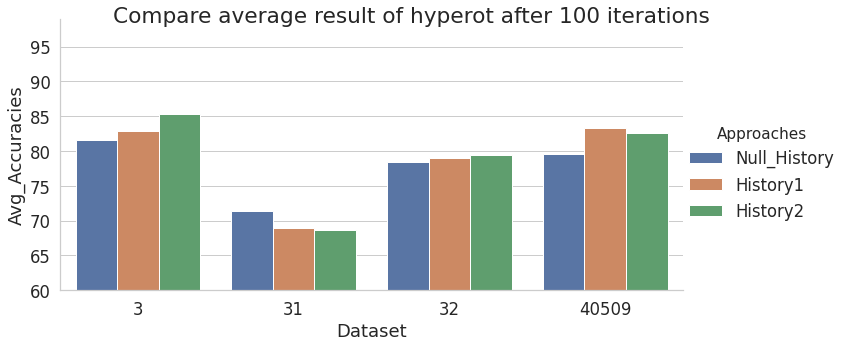

In [2]:
history_3 = 82.83 #21249
with_history_3 = 85.31 #19661
without_history_3 = 81.52

history_31 = 68.92 #8742
with_history_31 = 68.72 #6642 history
without_history_31 = 71.42

history_32 =79.03 #10203
with_history_32 = 79.38 #8051
without_history_32 = 78.42

history_125923 = 83.36 #6803
with_history_125923 = 82.56 #4856
without_history_125923 = 79.57


dataframe1= {'Dataset':[3,31,32,40509],
             'Null_History':[without_history_3,without_history_31,without_history_32,without_history_125923],
             'History1':[history_3,history_31,history_32,history_125923],
             'History2':[with_history_3,with_history_31,with_history_32,with_history_125923],

            }


dataframe_1= pd.DataFrame(dataframe1)
dataframe_2 = pd.melt(dataframe_1, id_vars="Dataset", var_name="Approaches", value_name="Avg_Accuracies")

dataframe_2.head()

sns.set(font_scale=1.5,style='whitegrid')
# sns.set_context("talk",font_scale=1.4,rc={'figure.figsize':(11.7,15)} )

g= sns.catplot(x='Dataset', y='Avg_Accuracies', hue='Approaches', data=dataframe_2, kind='bar',aspect=2)

g.set(ylim=(60,99))
g.fig.suptitle('Compare average result of hyperot after 100 iterations')

Text(0.5, 1.0, 'Compare average result of hyperot after 100 iterations - Best_Found')

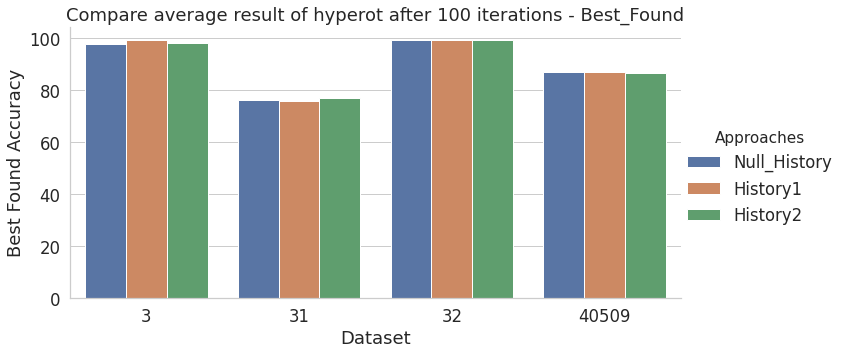

In [14]:
#Best Found

history_3 =  99.31 #21249
with_history_3 = 98.09 #19661
without_history_3 = 97.80

history_31 =  76.1  #8742
with_history_31 =  77.1 #6642 history
without_history_31 = 76.5 

history_32 = 99.42  #10203
with_history_32 =  99.35#8051
without_history_32 = 99.55

history_125923 =  87.10 #6803
with_history_125923 =  86.81 #4856
without_history_125923 =87.24 


dataframe1= {'Dataset':[3,31,32,40509],
             'Null_History':[without_history_3,without_history_31,without_history_32,without_history_125923],
             'History1':[history_3,history_31,history_32,history_125923],
             'History2':[with_history_3,with_history_31,with_history_32,with_history_125923],

            }


dataframe_1= pd.DataFrame(dataframe1)
dataframe_2 = pd.melt(dataframe_1, id_vars="Dataset", var_name="Approaches", value_name="Best Found Accuracy")

dataframe_2.head()

sns.set(font_scale=1.5,style='whitegrid')
# sns.set_context("talk",font_scale=1.4,rc={'figure.figsize':(11.7,15)} )

g= sns.catplot(x='Dataset', y='Best Found Accuracy', hue='Approaches', data=dataframe_2, kind='bar',aspect=2)

# g.set(ylim=(100,100))
# g.fig.suptitle('Compare average result of hyperot after 100 iterations - Best_Found')
plt.title('Compare average result of hyperot after 100 iterations - Best_Found')

## Dataset 3

#### quality openml points

In [12]:
trial_3 = pickle.load(open("/home/dfki/Desktop/Thesis/openml_test/pickel_files/3/trial_3.p", "rb"))


In [13]:
# all_trials = pickle.load(open("/home/dfki/Desktop/Thesis/hyperopt/result_openml/mylaptop/3/dima/3/10000it_0in_3.p", "rb"))
# trial_3 = temp.remove_zero_trial(all_trials)

In [14]:
len(trial_3.trials)

21249

In [15]:
np.array([79.84,83,85,86,88,88.38]).std()

2.945107053326847

Text(0.5, 1.0, 'Different approaches for 100 iteration try- Dataset 3')

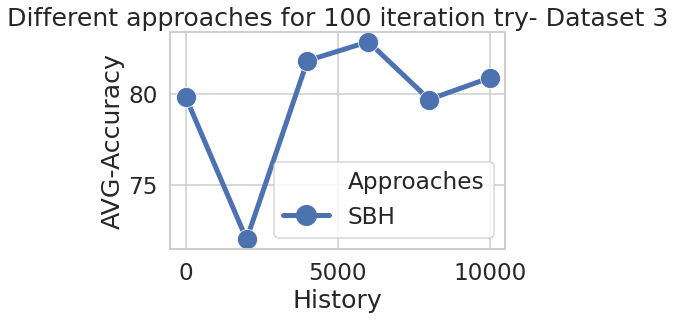

In [3]:
#100 iterations

x_axis = [0,2000,4000,6000,8000,10000]

avg_acc_our_3 = np.array([79.84,73.59,93.23,63.47,83.87,89.81])#
avg_acc_random_3 = np.array([79.84,83,85,86,88,88.38])
# avg_acc_removedLF_random_3  =np.array([84.90,82.44,86.12,87.19,86.93,87.46])
# avg_acc_removedLF_our_3 =np.array([84.86,73.78,89.10,74.80,82.14,87.65])
# avg_acc_gamma1_our_3 = np.array([93.02,74.49,70.02,67.55,83.55,87.34])
# avg_acc_gamma1_random_3 = np.array([93.02,83.87,83.69,85.90,87.25,87.92])

histogram = np.array([79.84,72,81.84,82.88,79.7,80.90])
histogram_1000run=np.array([87.65,78.01,82.42,85.73,82,84.16])
# histogram_gamma1 = np.array([93.02,81.7,84.1,82.68,82.08,87.92])
# histogram_lf = np.array([84.86,76.43,84.55,85.46,79.79,78.46])
# histogram_gamma1_lf = np.array([92.64,86.23,86.31,86.97,88.68,86.41])
best_history= np.array([79.84,66.39,82.03,65.60,63.20,62.88])
worst_history=np.array([79.84,52.22,87.98,91.88,69.27,86.90])


# avg_acc_our_fromhyperopthistory = np.array([79.84,98.26,74.55,64.95,55.92]) #until 8000 history




d = {'History':x_axis,
#     'SB':avg_acc_our_3, 
#     'SB_removedLF':avg_acc_removedLF_our_3, 
#     'SB_gamma1':avg_acc_gamma1_our_3,
     
#      'SB_hpinput':avg_acc_our_fromhyperopthistory,
     
#     'SBR':avg_acc_random_3, 
#     'SBR_removedLF':avg_acc_removedLF_random_3, 
#     'SBR_gamma1':avg_acc_gamma1_random_3,
     
     'SBH':histogram,
#      'SBH_gamma1':histogram_gamma1,
#      'SBH_removedLF':histogram_lf,
#      'SBH_removedLF_gamma1':histogram_gamma1_lf,
#      'SBH_1000run':histogram_1000run,
     
#      'SB_Best':best_history,
#      'SB_worst':worst_history
     
    }
pdnumsqr = pd.DataFrame(d)

sns.set(font_scale=1.4,style='whitegrid',)
sns.set_context("talk",font_scale=1.4, rc={"lines.linewidth": 5,'lines.markersize':20})

sns.lineplot(x='History', y='AVG-Accuracy',style='Approaches',markers=True,dashes=False,hue='Approaches',data=pd.melt(pdnumsqr,['History'],value_name ='AVG-Accuracy',var_name='Approaches')).set_title('Different approaches for 100 iteration try- Dataset 3')

## Dataset 31

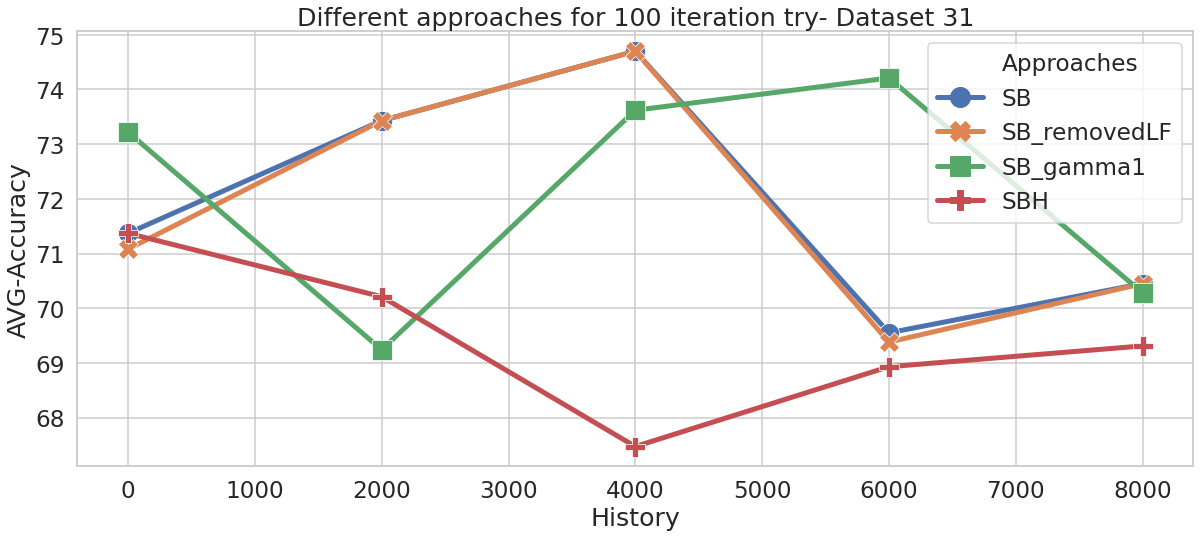

In [13]:
# avg accuracy for 100 iteration data set 31
x_axis_31 = [0,2000,4000,6000,8000]

avg_acc_our_31 = np.array([71.37,73.43,74.70,69.55,70.45])
avg_acc_removedLF_our_31 = np.array([71.08,73.43,74.70,69.38,70.45])
avg_acc_gamma1_our_31 = np.array([73.22,69.24,73.62,74.21,70.28])

avg_acc_gamma1_random_31 = np.array([73.22,70.22,69.23,69.08,70.39])
avg_acc_removedLF_random_31 = np.array([71.08,68.48,68.58,66.16,70.40])
# avg_acc_random_31  = np.array([71.37,])

histogram_31 = np.array([71.37,70.21,67.47,68.93,69.31])

d31 = {'History':x_axis_31,
    'SB':avg_acc_our_31, 
 
    'SB_removedLF':avg_acc_removedLF_our_31, 
    'SB_gamma1':avg_acc_gamma1_our_31,
#     'SBR_removedLF':avg_acc_removedLF_random_31,  
#     'SBR':avg_acc_random_31,
#     'SBR_gamma1':avg_acc_gamma1_random_31,
       
     'SBH':histogram_31  
    }
pd31 = pd.DataFrame(d31)

sns.set(font_scale=1.4,style='whitegrid',)
sns.set_context("talk",font_scale=1.4, rc={"lines.linewidth": 5,'lines.markersize':20})

g1=sns.lineplot(x='History', y='AVG-Accuracy',style='Approaches',markers=True,dashes=False,hue='Approaches',data=pd.melt(pd31,['History'],value_name ='AVG-Accuracy',var_name='Approaches')).set_title('Different approaches for 100 iteration try- Dataset 31')


## Dataset 32

Text(0.5, 1.0, 'Different approaches for 100 iteration try- Dataset 32')

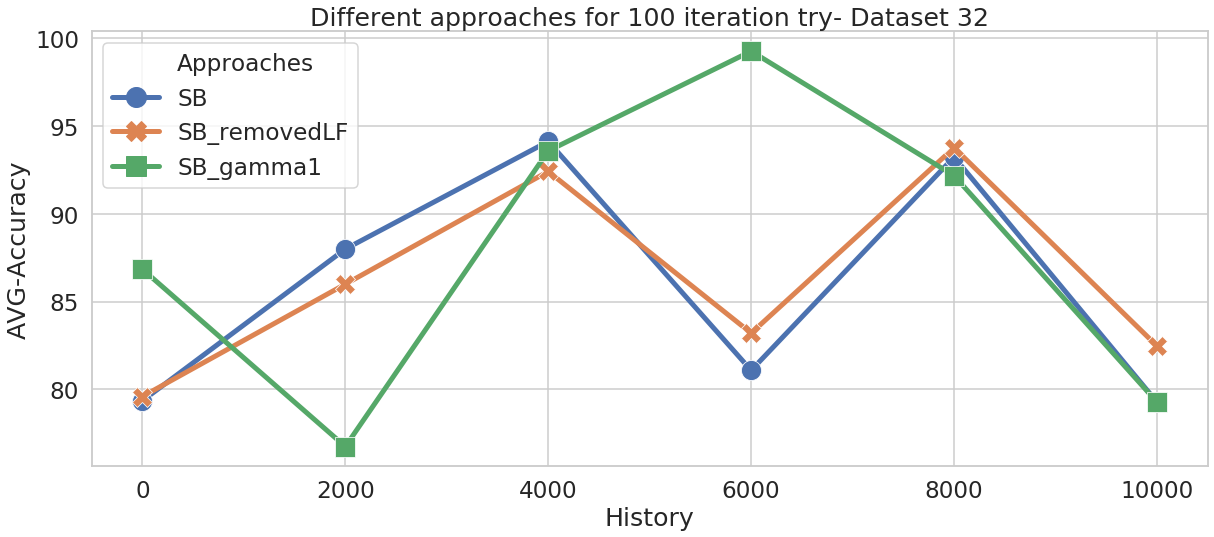

In [27]:
# avg accuracy for 100 iteration data set 32
x_axis_32 = [0,2000,4000,6000,8000,10000]

avg_acc_our_32 = np.array([79.36,88,94.13,81.09,93.24,79.28])
avg_acc_removedLF_our_32 = np.array([79.60,86,92.42,83.21,93.77,82.48])
avg_acc_gamma1_our_32 = np.array([86.85,76.75,93.59,99.27,92.18,79.28])



d32 = {'History':x_axis_32,
    'SB':avg_acc_our_32, 
#     'SBR':avg_acc_random_32, 
#     'SBR_removedLF':avg_acc_removedLF_random_32,  
    'SB_removedLF':avg_acc_removedLF_our_32, 
    'SB_gamma1':avg_acc_gamma1_our_32,
#     'SBR_gamma1':avg_acc_gamma1_random_32
    }
pd32 = pd.DataFrame(d32)

sns.set(font_scale=1.4,style='whitegrid',)
sns.set_context("talk",font_scale=1.4, rc={"lines.linewidth": 5,'lines.markersize':20})

sns.lineplot(x='History', y='AVG-Accuracy',style='Approaches',markers=True,dashes=False,hue='Approaches',data=pd.melt(pd32,['History'],value_name ='AVG-Accuracy',var_name='Approaches')).set_title('Different approaches for 100 iteration try- Dataset 32')

# Dataset 125923

Text(0.5, 1.0, 'Different approaches for 100 iteration try- Dataset 125923')

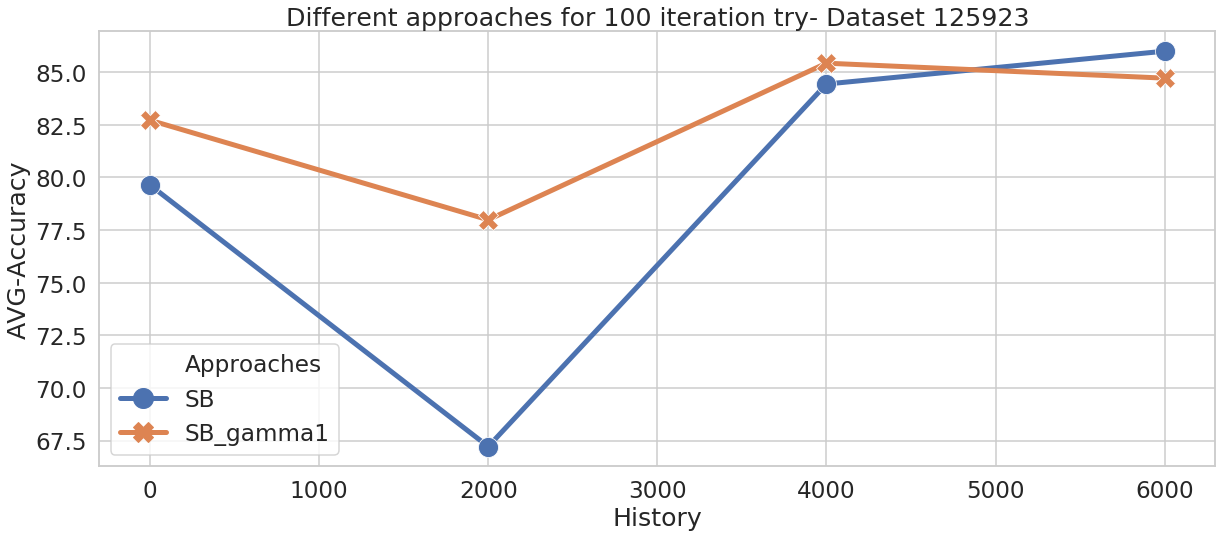

In [23]:
# avg accuracy for 100 iteration data set 32
x_axis_125923 = [0,2000,4000,6000]

avg_acc_our_125923 = np.array([79.64,67.22,84.44,86])
avg_acc_removedLF_our_125923 = np.array([])
avg_acc_gamma1_our_125923 = np.array([82.72,77.99,85.43,84.72])



d125923 = {'History':x_axis_125923,
    'SB':avg_acc_our_125923, 
#     'SBR':avg_acc_random_125923, 
#     'SBR_removedLF':avg_acc_removedLF_random_125923,  
#     'SB_removedLF':avg_acc_removedLF_our_125923, 
    'SB_gamma1':avg_acc_gamma1_our_125923,
#     'SBR_gamma1':avg_acc_gamma1_random_125923
    }
pd125923 = pd.DataFrame(d125923)

sns.set(font_scale=1.4,style='whitegrid',)
sns.set_context("talk",font_scale=1.4, rc={"lines.linewidth": 5,'lines.markersize':20})

sns.lineplot(x='History', y='AVG-Accuracy',style='Approaches',markers=True,dashes=False,hue='Approaches',data=pd.melt(pd125923,['History'],value_name ='AVG-Accuracy',var_name='Approaches')).set_title('Different approaches for 100 iteration try- Dataset 125923')

# Kmeans- select one item from heach cluster 

In [2]:
import pickle
experiment = pickle.load(open("/home/dfki/Desktop/Thesis/hyperopt/result_openml/mylaptop/3/automatic/new/cluster/experiment_history1.p", "rb"))
len(experiment)

FileNotFoundError: [Errno 2] No such file or directory: '/home/dfki/Desktop/Thesis/hyperopt/result_openml/mylaptop/3/automatic/new/cluster/experiment_history1.p'

In [3]:
def expriment_ploter(experiment,title):
    x_axis_kmeans=[]
    avg_acc_3_kmeans=[]
    std_3 =[]
    max_found_3 =[]
    history_quality=[]
    for item in experiment:
        x_axis_kmeans.append(item[0])
        avg_acc_3_kmeans.append(item[1])
        std_3.append(item[2])
        max_found_3.append(item[3])
        history_quality.append(item[4])

    d3kmeasn ={
        'History':x_axis_kmeans,
        'AVG-Accuracy':avg_acc_3_kmeans,
    #     'std':std_3,
        'Best_found':max_found_3,
        'History_quality':history_quality
    }

    pd3kmeasn = pd.DataFrame(d3kmeasn)

    sns.set(font_scale=1.4,style='whitegrid',)
    sns.set_context("talk",font_scale=1.4, rc={"lines.linewidth": 5,'lines.markersize':20})
    
    sns.lineplot(x='History', y='AVG-Accuracy',style='Approaches',markers=True,dashes=False,hue='Approaches',data=pd.melt(pd3kmeasn,['History'],value_name ='AVG-Accuracy',var_name='Approaches')).set_title('{}'.format(title))
    plt.legend(bbox_to_anchor=(1.03, 1), loc=2, borderaxespad=0.)
    
    
    
def experiment_STD(experiment):
    
    x_axis_kmeans=[]
    avg_acc_3_kmeans=[]
    std_3 =[]
    max_found_3 =[]
    history_quality=[]
    for item in experiment:
        x_axis_kmeans.append(item[0])
        avg_acc_3_kmeans.append(item[1])
        std_3.append(item[2])
        max_found_3.append(item[3])
        history_quality.append(item[4])

    d3kmeasn ={
        'History':x_axis_kmeans,
        'AVG-Accuracy':avg_acc_3_kmeans,
        'std':std_3,
#         'Best_found':max_found_3,
#         'History_quality':history_quality
    }

    pd3kmeasn = pd.DataFrame(d3kmeasn)
    
    g = sns.FacetGrid(pd3kmeasn,height=5,aspect=3)

    ax = g.map(plt.errorbar, "History", "AVG-Accuracy", "std")

    ax.set(xlabel="History", ylabel="Avg-acc")


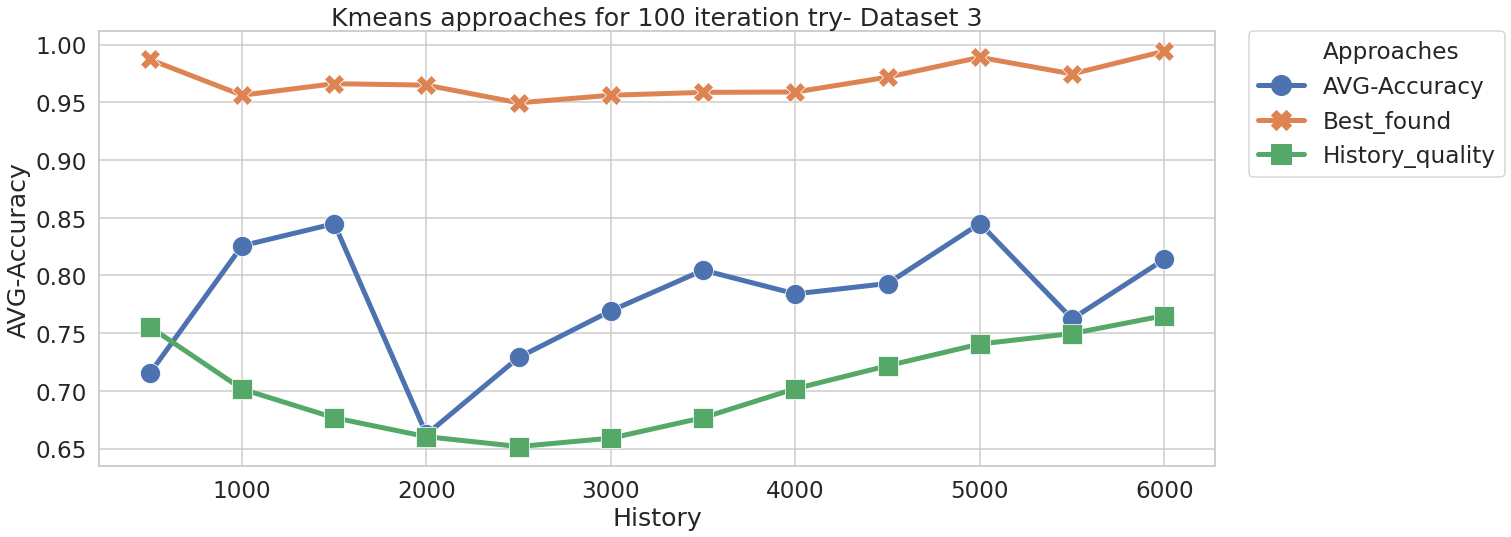

In [23]:

sns.lineplot(x='History', y='AVG-Accuracy',style='Approaches',markers=True,dashes=False,hue='Approaches',data=pd.melt(pd3kmeasn,['History'],value_name ='AVG-Accuracy',var_name='Approaches')).set_title('Kmeans approaches for 100 iteration try- Dataset 3')
plt.legend(bbox_to_anchor=(1.03, 1), loc=2, borderaxespad=0.)

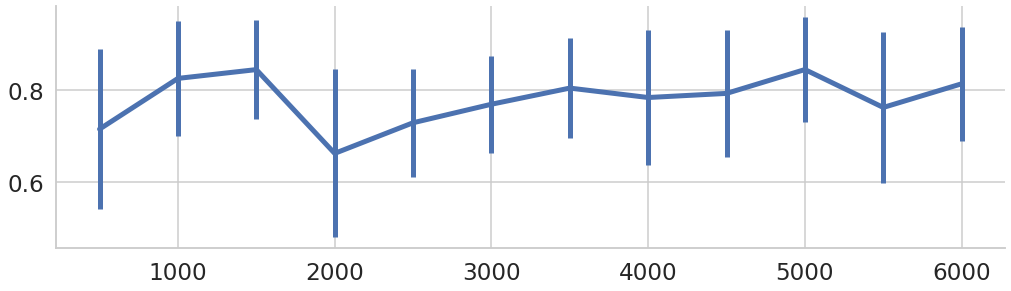

In [8]:

g = sns.FacetGrid(pd3kmeasn,height=5,aspect=3)

ax = g.map(plt.errorbar, "History", "AVG-Accuracy", "std")

ax.set(xlabel="", ylabel="")


# compare two approache None and removed null columns with zero -(21945,48) with (21945,79)

In [3]:
# experiment1 = pickle.load(open("/home/dfki/Desktop/Thesis/hyperopt/result_openml/mylaptop/3/automatic/new/cluster/experiment_history3.p", "rb"))
experiment2 = pickle.load(open("/home/dfki/Desktop/Thesis/hyperopt/result_openml/mylaptop/3/automatic/new/cluster/experiment_history3_zeroapproach.p", "rb"))

In [5]:
# [iteration,
#  avg_score,
#  standard_deviation,
#  max_start_end,
#  history_quality]

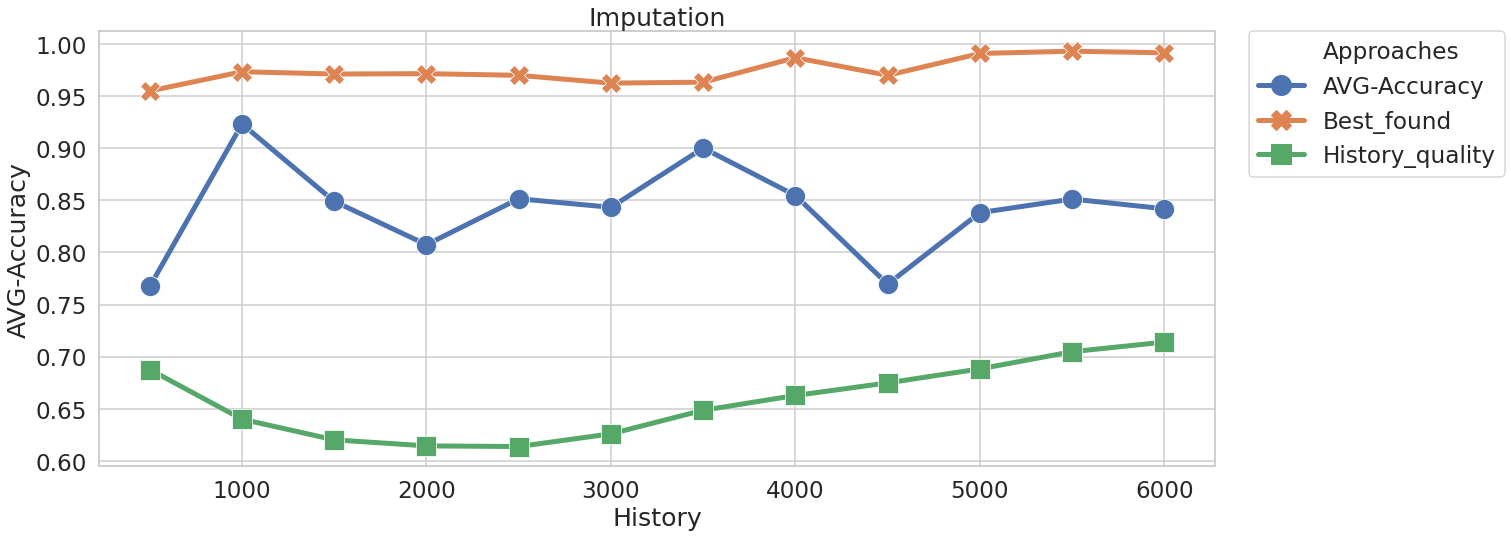

In [8]:
experiment1 = [[500,0.767320349630903, 0.1739224469888012,0.954937304075235,0.6875788455844807],
              [1000,0.9232415425809822,0.059441322253295535,0.9734032131661443,0.6399514984780976],
              [1500,0.8489995956446341,0.14713495571583818,0.9712117946708464,0.620136418250313],
              [2000,0.8074604850684703,0.11082135311086729,0.9715242946708464,0.614344959663329],
              [2500,0.8514851403311128 ,0.14681706099242964,0.9699617946708464,0.6137280326478097],
              [3000,0.8432950252720933 ,0.13599408195629084,0.9624500391849529,0.6259372103137255],
              [3500,0.9001780792842216, 0.09106059780066056,0.9633806818181817,0.6485495197057036],
              [4000,0.8546166630634526,0.11732975156744407,0.9868563871473356,0.6627176848538798],
              [4500,0.7695357546636519,0.177301788430332,0.9699578761755486,0.6748049544088444],
              [5000,0.8381737164280268,0.12480184095802326,0.9909228056426332,0.6882499899003754],
              [5500,0.8512358708102241,0.12089053651337106,0.993114224137931,0.7047487105622938],
              [6000,0.8419012171826019,0.14221805062711548,0.9915487852664577,0.713945652555486]]

expriment_ploter(experiment1,'Imputation')

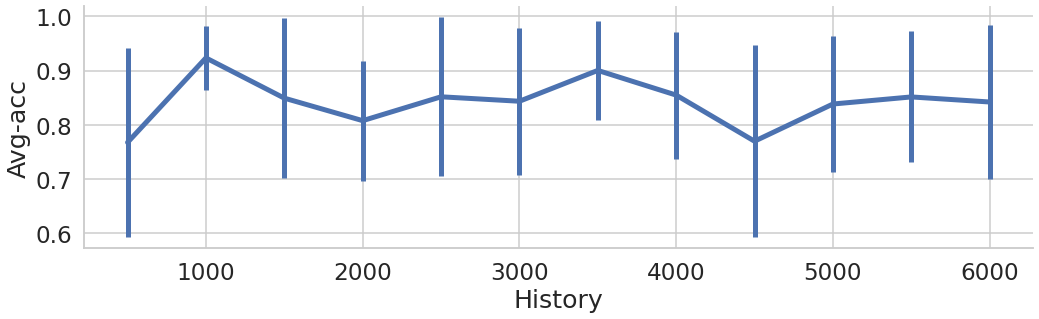

In [10]:
experiment_STD(experiment1)

In [1]:
expriment_ploter(experiment2,'Zero approach')

NameError: name 'expriment_ploter' is not defined

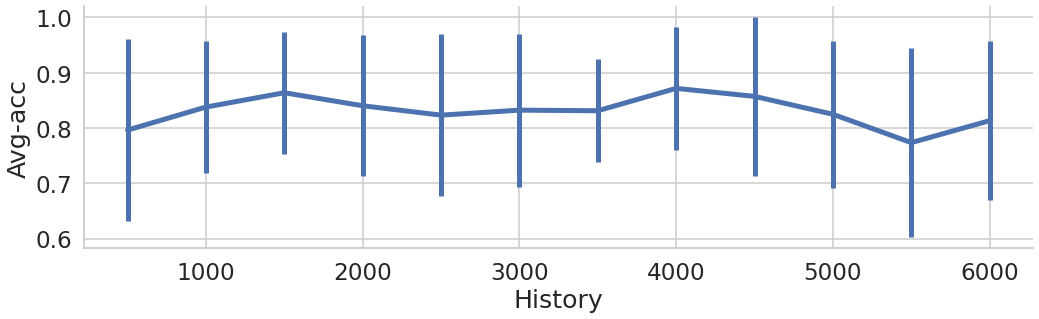

In [11]:
experiment_STD(experiment2)

# try on small Histories

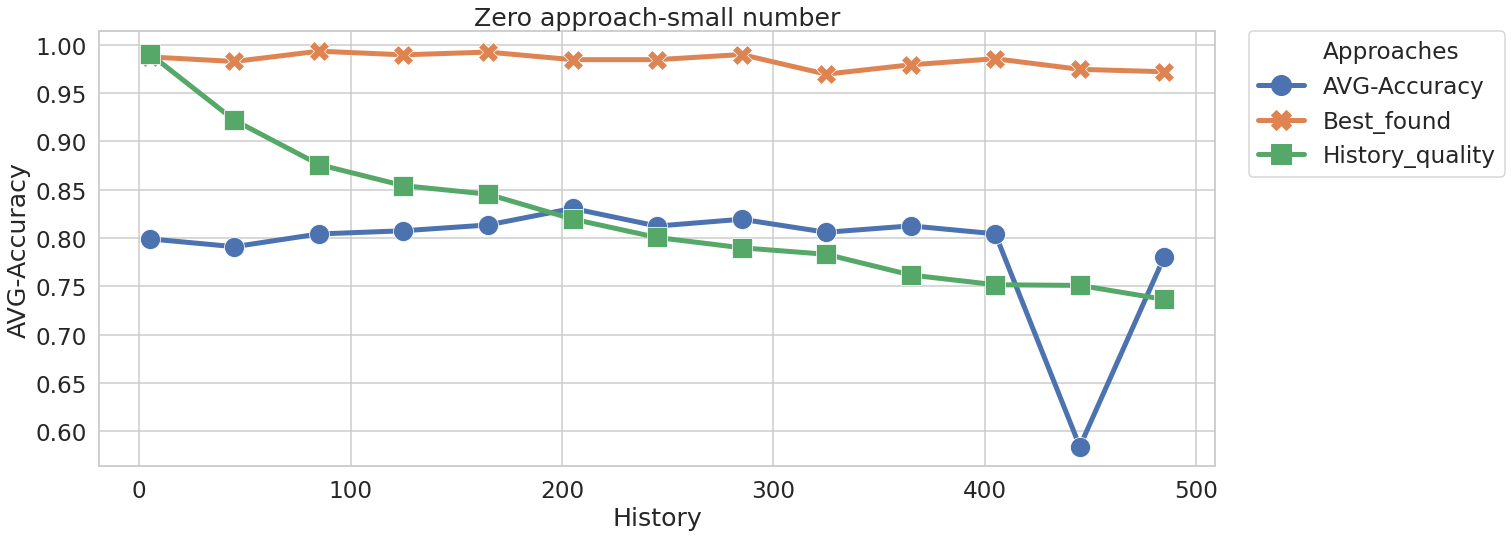

In [32]:
experiment3 = pickle.load(open("/home/dfki/Desktop/Thesis/hyperopt/result_openml/mylaptop/3/automatic/new/cluster/experiment_kmeans_5to500_zero_79feature.p", "rb"))
expriment_ploter(experiment3,'Zero approach-small number')

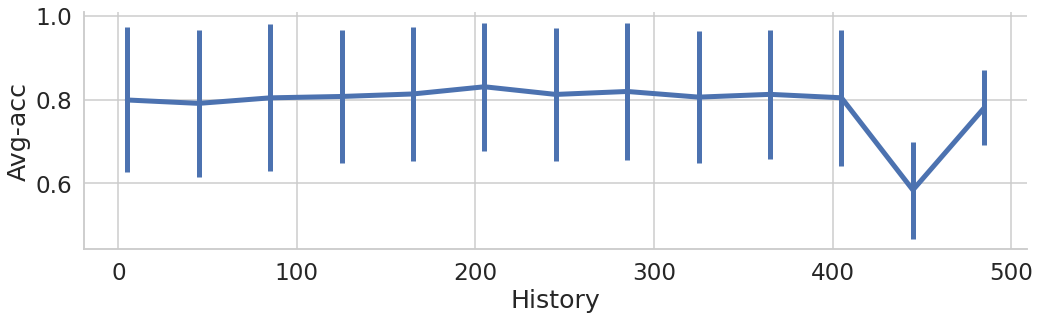

In [33]:
experiment_STD(experiment3)

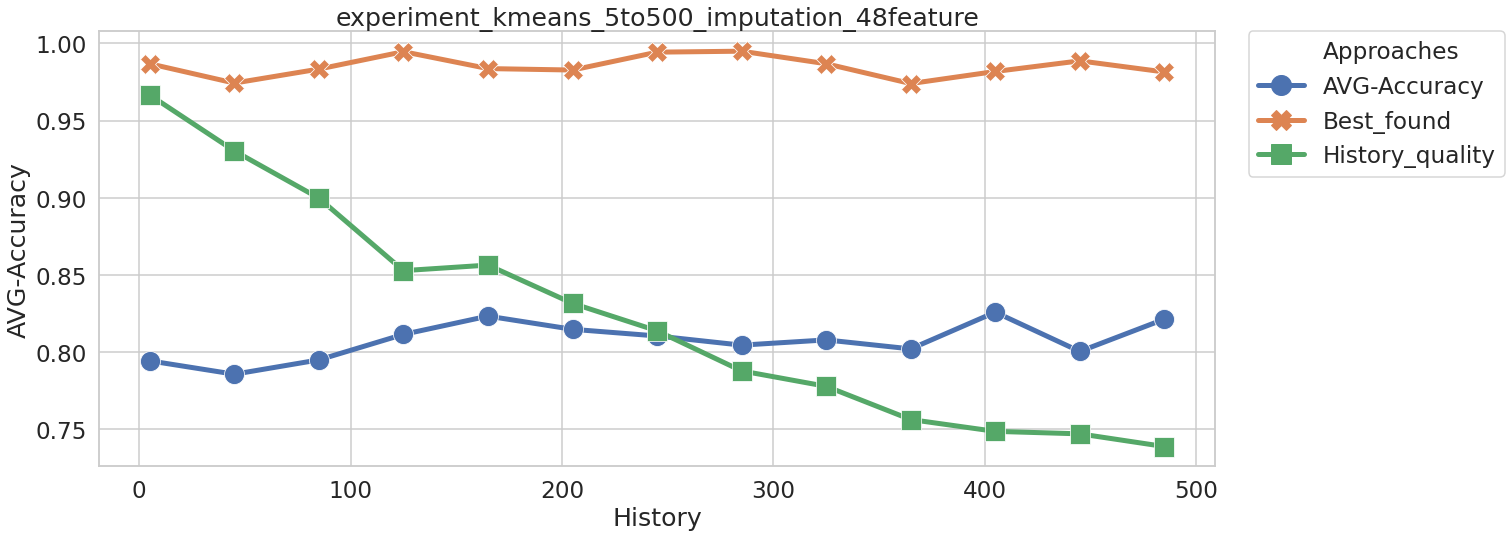

In [35]:
experiment5 = pickle.load(open("/home/dfki/Desktop/Thesis/hyperopt/result_openml/mylaptop/3/automatic/new/cluster/new_laptop/experiment_kmeans_5to500_imputation_48feature.p", "rb"))
expriment_ploter(experiment5,'experiment_kmeans_5to500_imputation_48feature')

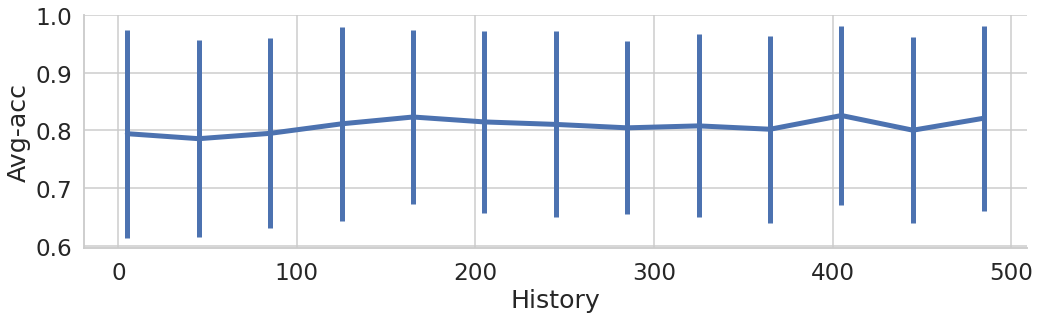

In [36]:
experiment_STD(experiment5)

# chnage gamma and LF

In [ ]:
experiment_kmeans_5to500_zero_79feature_removedlf_gamma2

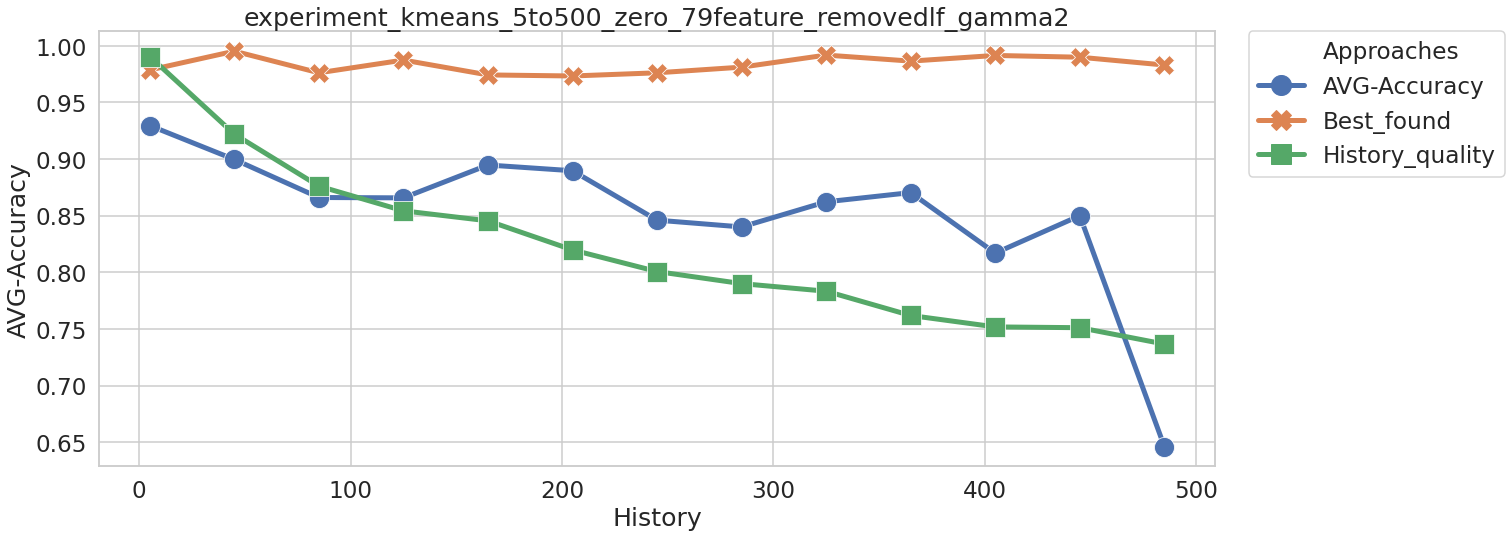

In [34]:
experiment4 = pickle.load(open("/home/dfki/Desktop/Thesis/hyperopt/result_openml/mylaptop/3/automatic/new/cluster/experiment_kmeans_5to500_zero_79feature_removedlf_gamma2.p", "rb"))
expriment_ploter(experiment4,'experiment_kmeans_5to500_zero_79feature_removedlf_gamma2')

# Histogram equal percentage from each bin 

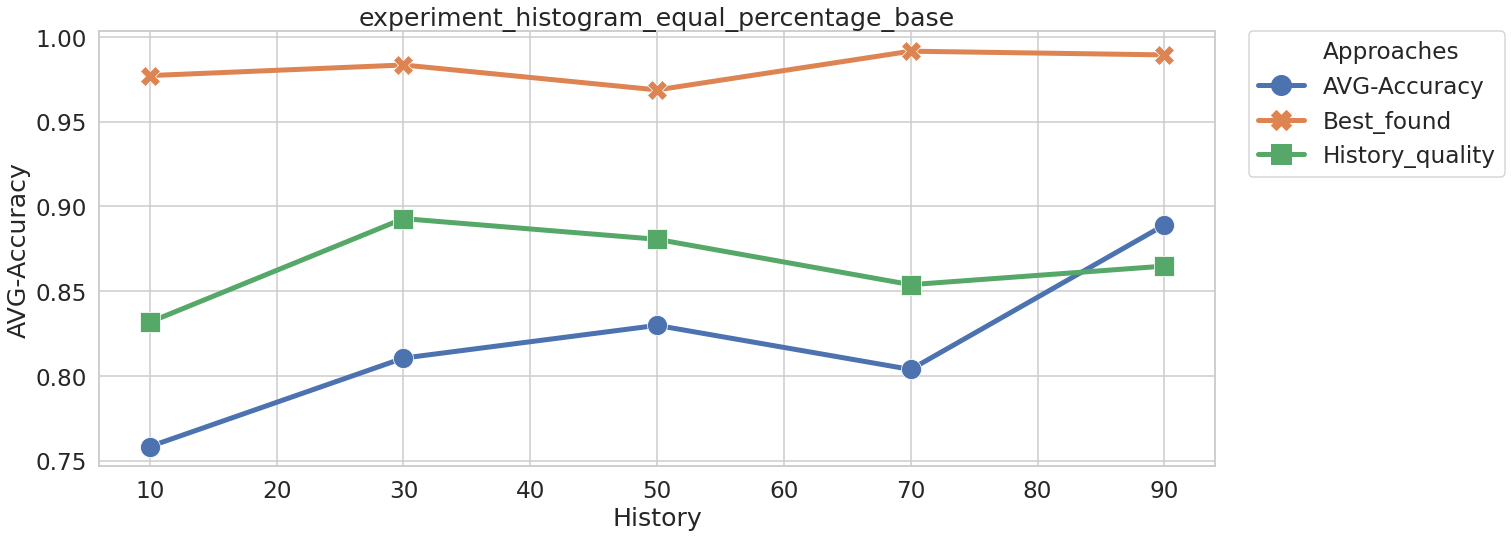

In [8]:
experiment6= pickle.load(open("/home/dfki/Desktop/Thesis/hyperopt/result_openml/mylaptop/3/automatic/new/cluster/histogram_equal_percentage_base.p", "rb"))
expriment_ploter(experiment6,'experiment_histogram_equal_percentage_base')

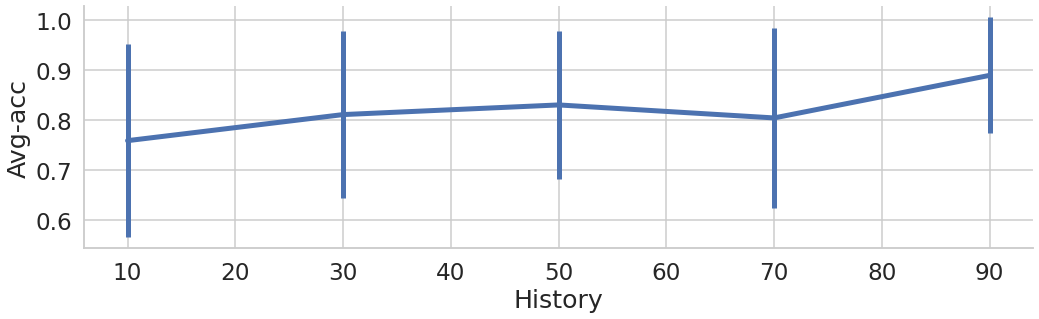

In [7]:
experiment_STD(experiment6)

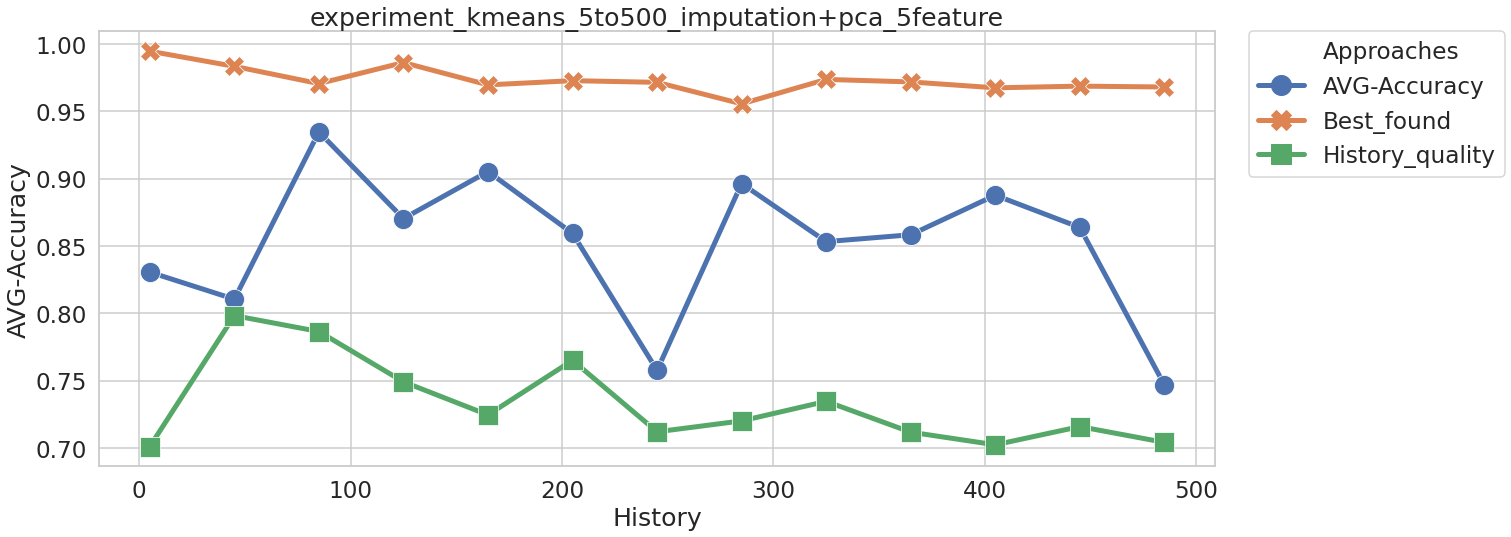

In [9]:
experiment7= pickle.load(open("/home/dfki/Desktop/Thesis/hyperopt/result_openml/mylaptop/3/automatic/new/cluster/new_laptop/kmeans_5to500_imputation+pca_5feature.p", "rb"))
expriment_ploter(experiment7,'experiment_kmeans_5to500_imputation+pca_5feature')

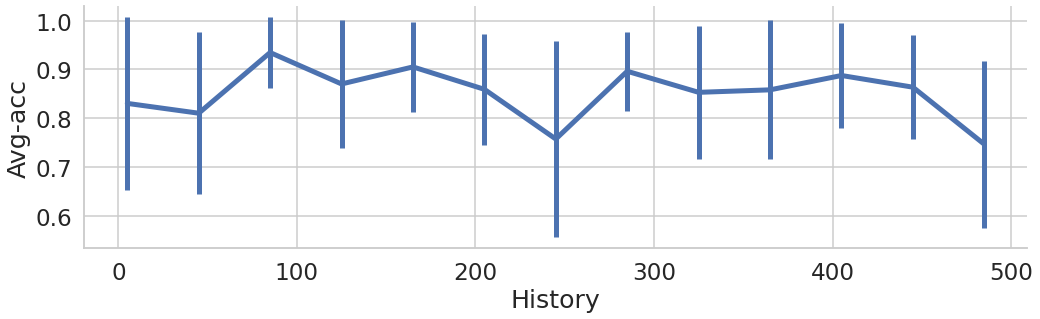

In [10]:
experiment_STD(experiment7)

# dataset 31

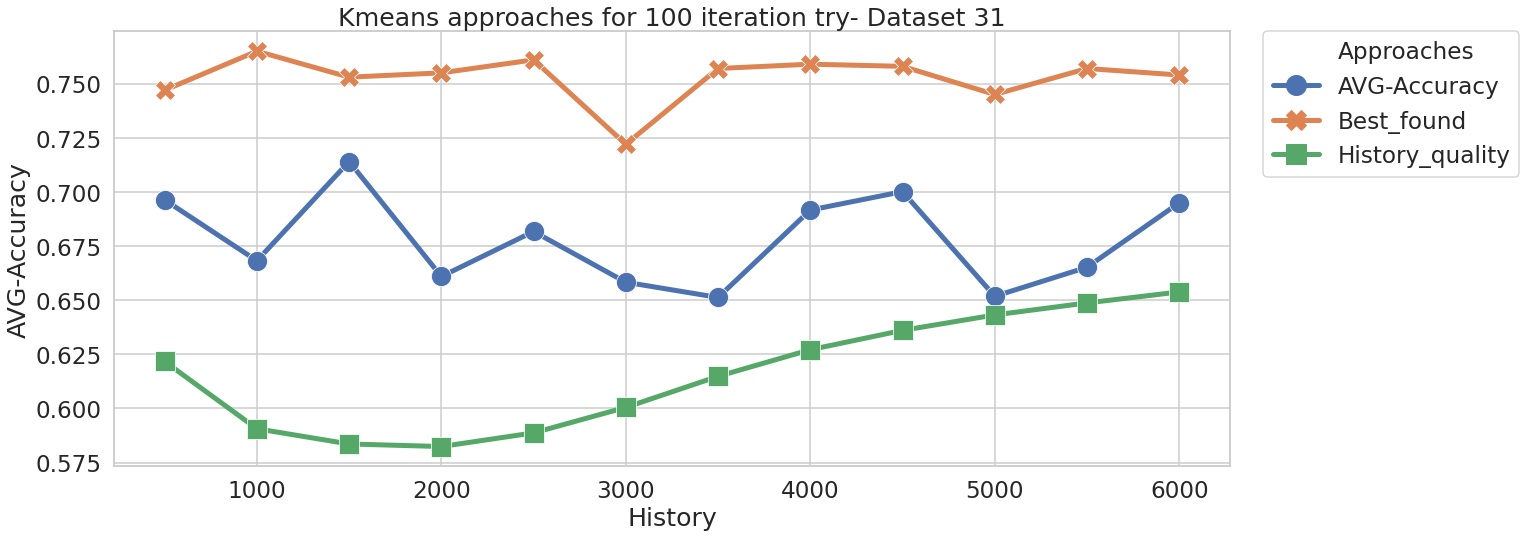

In [11]:
sns.lineplot(x='History', y='AVG-Accuracy',style='Approaches',markers=True,dashes=False,hue='Approaches',data=pd.melt(pd3kmeasn,['History'],value_name ='AVG-Accuracy',var_name='Approaches')).set_title('Kmeans approaches for 100 iteration try- Dataset 31')
plt.legend(bbox_to_anchor=(1.03, 1), loc=2, borderaxespad=0.)

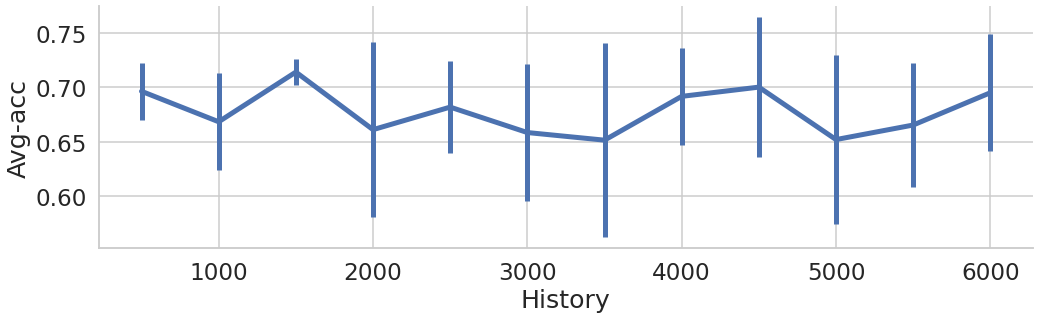

In [9]:
g = sns.FacetGrid(pd3kmeasn,height=5,aspect=3)

ax = g.map(plt.errorbar, "History", "AVG-Accuracy", "std")

ax.set(xlabel="History", ylabel="Avg-acc")

In [31]:
np.arange(5,500,40)

array([  5,  45,  85, 125, 165, 205, 245, 285, 325, 365, 405, 445, 485])